In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris#scipykit-learn也可以导入数据
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,classification_report,cohen_kappa_score


# 一、导入数据

In [2]:
data=load_iris()
dir(data)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
X=pd.DataFrame(data=data.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
y=data.target

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


<AxesSubplot:>

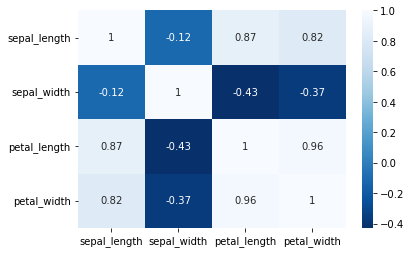

In [6]:
print(X.corr())
sns.heatmap(X.corr(),annot=True,cmap='Blues_r')

# 二、线性判别分析
## 1、LinearDiscriminatAnalysis的基本方法和属性

In [7]:
model=LinearDiscriminantAnalysis()
model.fit(X,y)

LinearDiscriminantAnalysis()

In [8]:
print(model.coef_)#显示系数，意义不大
print(model.score(X,y))#计算准确率

[[  6.31475846  12.13931718 -16.94642465 -20.77005459]
 [ -1.53119919  -4.37604348   4.69566531   3.06258539]
 [ -4.78355927  -7.7632737   12.25075935  17.7074692 ]]
0.98


In [9]:
model.priors_#显示先验概率

array([0.33333333, 0.33333333, 0.33333333])

explained_variance_ration_属性，考察各线性判元对于组间方差的贡献度。

In [10]:
model.explained_variance_ratio_

array([0.9912126, 0.0087874])

scaling_属性，考察线性判元的估计值。Scaling of the features in the space spanned by the class centroids。

In [11]:
lde=pd.DataFrame(model.scalings_,index=data.feature_names,columns=['LD1','LD2'])#linear discriminant coefficience
lde

,LD1,LD2
sepal length (cm),0.829378,0.024102
sepal width (cm),1.534473,2.164521
petal length (cm),-2.201212,-0.931921
petal width (cm),-2.810460,2.839188


transform方法，可得线性判别得分。

In [12]:
lds=model.transform(X)#linear discriminant score
lds[:5,1]

array([ 0.30042062, -0.78666043, -0.26538449, -0.67063107,  0.51446253])

In [13]:
lds=pd.DataFrame(lds,columns=['LDS1','LDS2'])#生成线性判别得分的数据库，并设置classifier。
lds['species']=data.target
print(lds.head())

       LDS1      LDS2  species
0  8.061800  0.300421        0
1  7.128688 -0.786660        0
2  7.489828 -0.265384        0
3  6.813201 -0.670631        0
4  8.132309  0.514463        0


In [14]:
dic={0:'setosa',1:'versicolor',2:'virginica'}#赋予分类器具体含义
for i in range(150):
    for s in range(3):
        if lds.species[i] == s:
            lds.species[i] = dic[s]

/var/folders/_q/jfbwm6ld1hj436yhbvvnngt00000gn/T/ipykernel_18839/3140446481.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lds.species[i] = dic[s]
/Users/singal/miniforge3/envs/py38/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [15]:
lds.head()

,LDS1,LDS2,species
0,8.061800,0.300421,setosa
1,7.128688,-0.786660,setosa
2,7.489828,-0.265384,setosa
3,6.813201,-0.670631,setosa
4,8.132309,0.514463,setosa


在降维之后的线性判元空间中，setosa品种可与其他两种品种很好的区分开，这种区分能力几乎完全来自于LDS1

<AxesSubplot:xlabel='LDS1', ylabel='LDS2'>

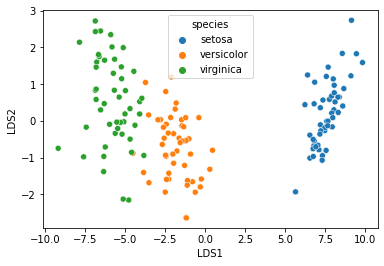

In [16]:
sns.scatterplot(x=lds.LDS1,y=lds.LDS2,data=lds,hue='species')

## 2、使用mlxtend绘制决策边界
绘制决策边界，decision region。

准确率为： 0.96


<AxesSubplot:>

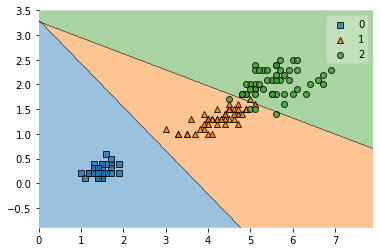

In [17]:
from mlxtend.plotting import plot_decision_regions
X2=X.iloc[:,2:4]
model2=LinearDiscriminantAnalysis()
model2.fit(X2,y)
print('准确率为：',model2.score(X2,y))
plot_decision_regions(np.array(X2),y,model2)#数据矩阵必须为数组，当X含有两个以上的特征时，需给出filler values。

图显示，线性判别分析的决策边界确实为线性，与理论相符。
## 3、二分类模型的评估
二分类模型评估的三板斧：
1. confusion_matrix
2. classification_report
3. cohen_kappa_score

参数均为(ytest,pred)。

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,stratify=y,random_state=123)
model=LinearDiscriminantAnalysis()
model.fit(xtrain,ytrain)
print('测试集预测准确率为：',model.score(xtest,ytest))
prob=model.predict_proba(xtest)
pred=model.predict(xtest)
print('各品种预测概率为：',prob[:3])
print('各品种预测为：',pred[:3])

测试集预测准确率为： 0.9777777777777777
各品种预测概率为： [[1.37493315e-32 5.86839618e-01 4.13160382e-01]
 [4.87880054e-42 4.08368248e-04 9.99591632e-01]
 [1.49908347e-19 9.99998532e-01 1.46841688e-06]]
各品种预测为： [1 2 1]


In [19]:
confusion_matrix(ytest,pred)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 15]])

In [20]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [21]:
cohen_kappa_score(ytest,pred)

0.9666666666666667

# 三、二次判别分析
二次判别分析只能基于正态分布计算后验概率，无法进行费雪判别分析，故无线性判元及其得分。
## 1、二分类模型的评估

In [22]:
model=QuadraticDiscriminantAnalysis()
model.fit(xtrain,ytrain)
accuracy=model.score(xtest,ytest)
prob=model.predict_proba(xtest)
pred=model.predict(xtest)
print('测试集预测准确率为：',accuracy)
print('各品种预测概率为：\n',prob[:3])
print('各品种预测为：',pred[:3])


测试集预测准确率为： 0.9777777777777777
各品种预测概率为：
 [[1.30728298e-117 4.25364516e-001 5.74635484e-001]
 [4.80474602e-185 1.17558005e-003 9.98824420e-001]
 [1.12275433e-056 9.99994095e-001 5.90465247e-006]]
各品种预测为： [2 2 1]


In [23]:
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))
cohen_kappa_score(ytest,pred)

[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



0.9666666666666667

In [24]:
X2=X.iloc[:,2:4]
model=QuadraticDiscriminantAnalysis().fit(X2,y)
model.score(X2,y)

0.98

## 2、绘制决策边界

<AxesSubplot:>

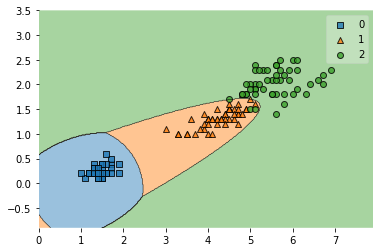

In [25]:
plot_decision_regions(np.array(X2),y,model)

结果显示，二次判别分析的决策边界为二次函数，与理论相符。